# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

In [1]:
import qem
import matplotlib.pyplot as plt
import numpy as np

legacyStatSTEM = qem.io.read_legacyInputStatSTEM('Example_PtIr.mat')
image = legacyStatSTEM['input']['obs']
dx = legacyStatSTEM['input']['dx']
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']

input_coordinates = inputStatSTEM['coordinates']
output_coordinates = outputStatSTEM['coordinates']
input_coordinates[:,1] = input_coordinates[:,1]/dx
input_coordinates[:,0] = input_coordinates[:,0]/dx

In [3]:
from qem.fitting import ImageModelFitting
model=ImageModelFitting(image, pixel_size=dx)
model.import_coordinates(input_coordinates[:,[1,0]])
model.fit_background = True
model.model = 'gaussian'
model.fit(maxiter=1000, tol=1e-5, step_size = 1e-2, verbose=True)

ModuleNotFoundError: No module named 'numba'

In [ ]:
from pyexpat import model
from pyStatSTEM.fit_jax import ImageModelFitting


model_gauss=ImageModelFitting(image, pixel_size=dx)
# %matplotlib qt5
# model_gauss.find_peaks()
model_gauss.same_width = True
model_gauss.import_coordinates(input_coordinates[:,[1,0]])
# model_gauss.fit(model='gaussian',step_size=0.01, max_iter=100, tol=1e-3)
model_gauss.segment_and_fit_gradient(model='gaussian', step_size=0.001, max_iter=1000, tol=1e-3,plot=True,buffer_size=5,patch_size =200)

In [4]:
model_gauss.plot()

NameError: name 'model_gauss' is not defined

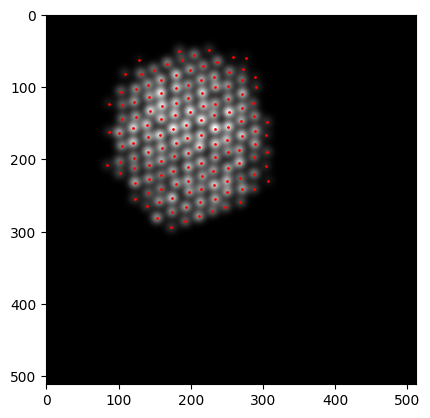

In [4]:
model_gauss.plot('prediction')

Optimization terminated successfully.
         Current function value: 0.006892
         Iterations: 45
         Function evaluations: 84


Fitting atomic columns: 100%|██████████| 135/135 [00:00<00:00, 264.27it/s]


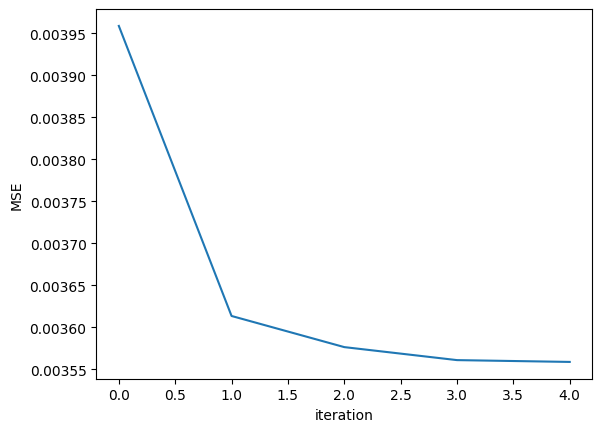

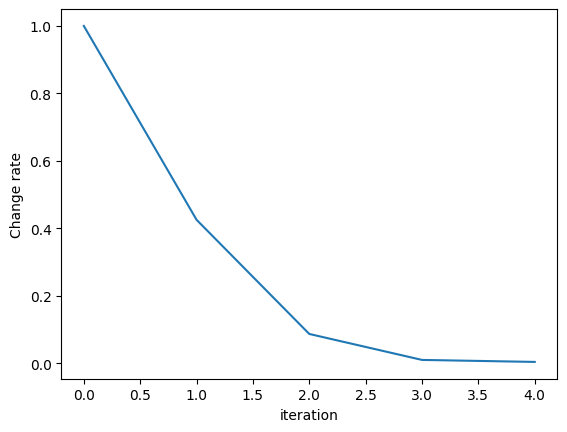

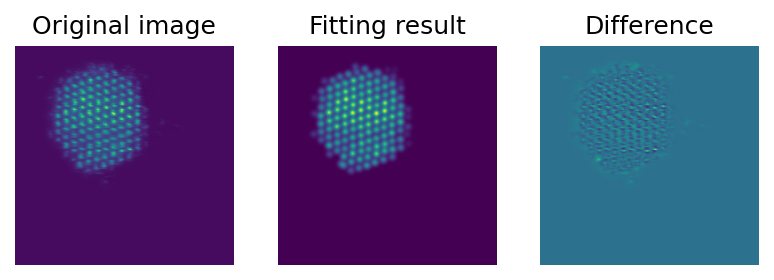

In [3]:
from pyStatSTEM.fit_numba import ImageModelFitting
model_gauss=ImageModelFitting(image, pixel_size=dx)
# %matplotlib qt5
# model_gauss.find_peaks(threshold_rel=0.10)
model_gauss.same_width = True
model_gauss.fit_background = True
model_gauss.import_coordinates(input_coordinates[:,[1,0]])
model_gauss.fit(view=True,rel_tol = 1e-3)


In [ ]:
model_gauss.plot('original')

In [ ]:
model_gauss.plot('prediction')

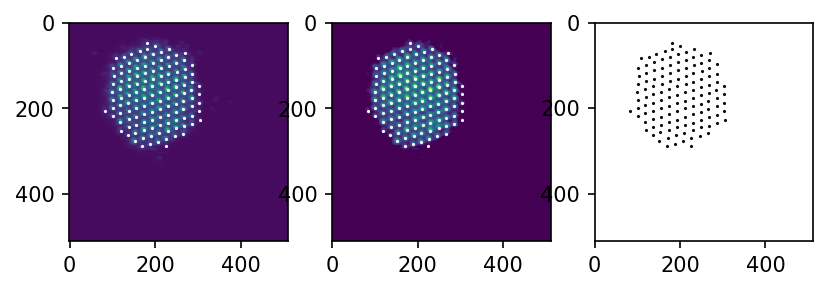

Optimization terminated successfully.
         Current function value: 0.000019
         Iterations: 53
         Function evaluations: 98


Fitting atomic columns: 100%|██████████| 129/129 [00:00<00:00, 278.83it/s]


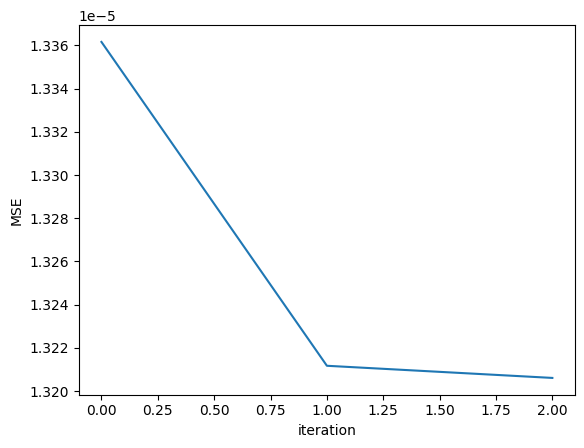

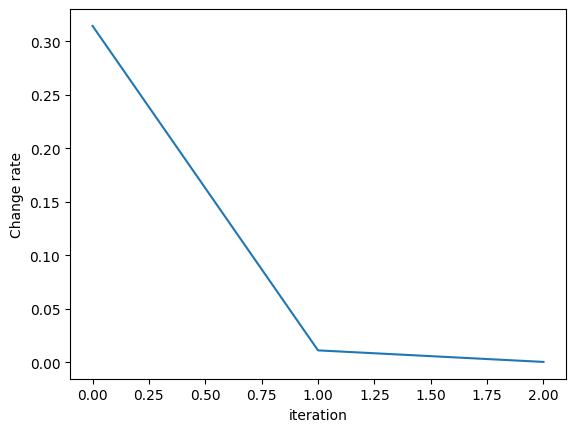

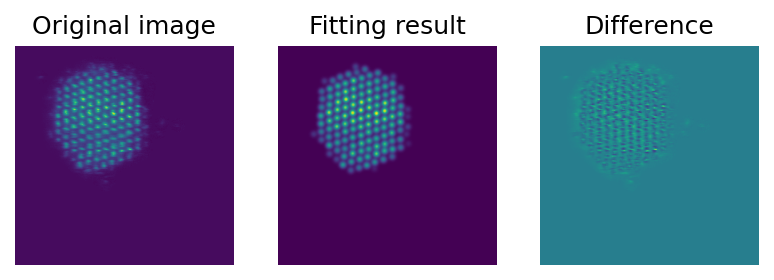

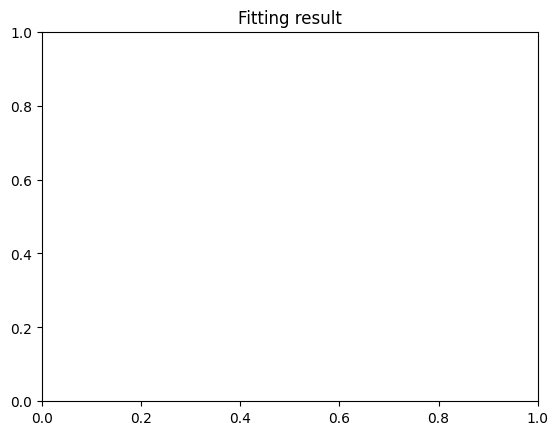

In [ ]:
from pyStatSTEM.classes import ImageProcess

f=ImageProcess(image)
f.find_peak(th_dist=15,th_inten=0.07)
f.import_coordinates(input_coordinates[:,[1,0]].T)
f.fit_gaussian(view=True)

In [ ]:
np.meshgrid(np.arange(0, 10, 1), np.arange(11, 13, 1))

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12]])]

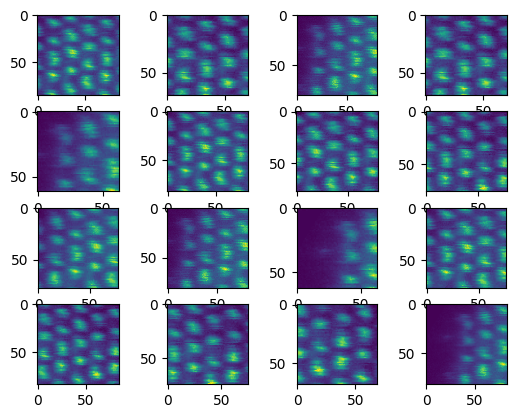

In [ ]:
from matplotlib.hatch import HorizontalHatch
import matplotlib.pyplot as plt
reg=model_gauss.segment_image()
fig, ax = plt.subplots(4,4)
i=0
j=0
for region in reg[:]:
    # find the boundaries of the region, get the leftmost, rightmost, topmost and bottommost atoms
    region_atoms = np.array(region)
    leftmost = np.min(region_atoms[:,0])
    rightmost = np.max(region_atoms[:,0])
    topmost = np.min(region_atoms[:,1])
    bottommost = np.max(region_atoms[:,1])
    horizontal = rightmost - leftmost
    vertical = bottommost - topmost
    windows_size = max(horizontal, vertical)

    # segment the image based on the boundaries
    image_region = model_gauss.image[int(leftmost):int(leftmost+windows_size), int(topmost):int(topmost+windows_size)]
    # add the region to the subplot
    ax[i,j].imshow(image_region)
    j+=1
    if j==4:
        i+=1
        j=0
    if i == 4:
        break

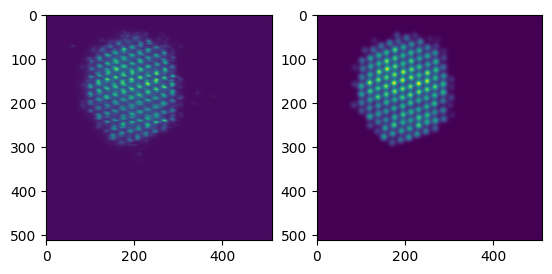

In [ ]:
plt.subplot(1,2,1)
plt.imshow(model_gauss.image)
plt.subplot(1,2,2)
plt.imshow(model_gauss.prediction)


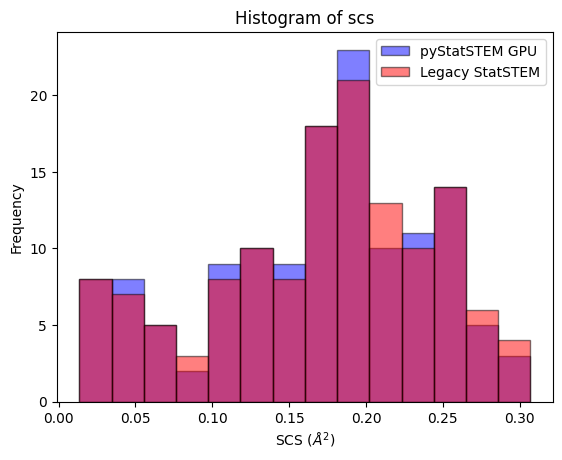

In [5]:
data1= model.volume
data2= outputStatSTEM['volumes']
combined_data = np.concatenate((data1, data2))
min_bin = combined_data.min()
max_bin = combined_data.max()

# Define the bin edges so that both histograms will use the same bins
bins = np.linspace(min_bin, max_bin, 15)

plt.hist(data1, bins=bins, edgecolor='black',label='pyStatSTEM GPU',color='blue',alpha=0.5)
plt.hist(data2, bins=bins, edgecolor='black',color='red',alpha=0.5, label='Legacy StatSTEM')
plt.title('Histogram of scs')
plt.xlabel(r'SCS ($\AA^2$)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

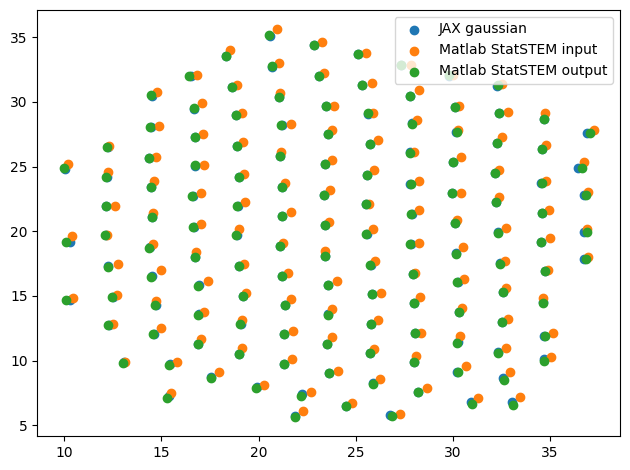

In [6]:
plt.scatter(model.pos_y,model.pos_x,label='JAX gaussian') 
# plt.scatter(model_voigt.params[0],model_voigt.params[1],label='JAX voigt') 

plt.scatter(input_coordinates[:,0]*dx,input_coordinates[:,1]*dx,label='Matlab StatSTEM input')
plt.scatter(output_coordinates[:,0],output_coordinates[:,1],label='Matlab StatSTEM output')
# plt.scatter(f.coordinate[0][0]*dx,f.coordinate[0][1]*dx,label='pyStatSTEM')
plt.legend()
plt.tight_layout()
# plt.equal_aspect_ratio()

Text(0.5, 1.0, 'Residuals gauss JAX')

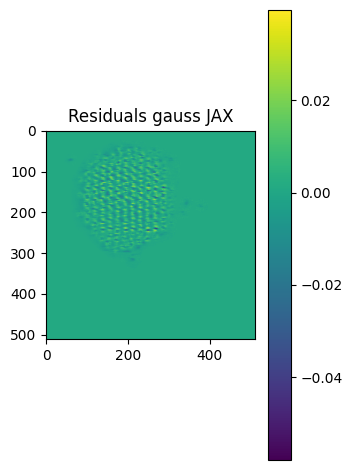

In [7]:
plt.subplot(1,2,1)
plt.imshow(model.prediction-model.image)
plt.colorbar()
plt.tight_layout()
plt.title('Residuals gauss JAX')

# plt.subplot(1,2,2)
# plt.imshow(model_voigt.prediction-model_voigt.image[0])
# plt.colorbar()
# plt.tight_layout()
# plt.title('Residuals vogit JAX')

NameError: name 'f' is not defined

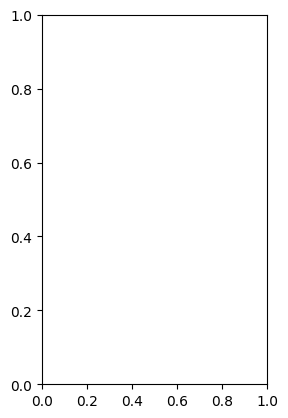

In [ ]:
# plt.subplot(1,2,1)
# plt.imshow(model_gauss.prediction-model_gauss.image)
# plt.colorbar()
# plt.tight_layout()
# plt.title('Residuals JAX')

plt.subplot(1,2,2)
plt.imshow(f.image[0]-f.image_fitted[0])
plt.colorbar()
plt.tight_layout()
plt.title('Residuals PyStatSTEM')


In [24]:
inputStatSTEM['Xaxis']

array([ 0.    ,  0.1211,  0.2422,  0.3633,  0.4844,  0.6055,  0.7266,
        0.8477,  0.9688,  1.0899,  1.211 ,  1.3321,  1.4532,  1.5743,
        1.6954,  1.8165,  1.9376,  2.0587,  2.1798,  2.3009,  2.422 ,
        2.5431,  2.6642,  2.7853,  2.9064,  3.0275,  3.1486,  3.2697,
        3.3908,  3.5119,  3.633 ,  3.7541,  3.8752,  3.9963,  4.1174,
        4.2385,  4.3596,  4.4807,  4.6018,  4.7229,  4.844 ,  4.9651,
        5.0862,  5.2073,  5.3284,  5.4495,  5.5706,  5.6917,  5.8128,
        5.9339,  6.055 ,  6.1761,  6.2972,  6.4183,  6.5394,  6.6605,
        6.7816,  6.9027,  7.0238,  7.1449,  7.266 ,  7.3871,  7.5082,
        7.6293,  7.7504,  7.8715,  7.9926,  8.1137,  8.2348,  8.3559,
        8.477 ,  8.5981,  8.7192,  8.8403,  8.9614,  9.0825,  9.2036,
        9.3247,  9.4458,  9.5669,  9.688 ,  9.8091,  9.9302, 10.0513,
       10.1724, 10.2935, 10.4146, 10.5357, 10.6568, 10.7779, 10.899 ,
       11.0201, 11.1412, 11.2623, 11.3834, 11.5045, 11.6256, 11.7467,
       11.8678, 11.9

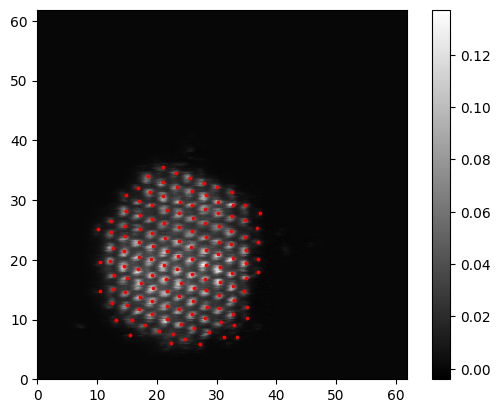

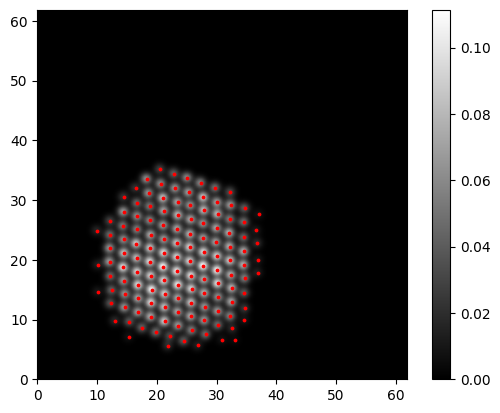

In [23]:
import pyStatSTEM
import matplotlib.pyplot as plt
import numpy as np

legacyStatSTEM = pyStatSTEM.io.read_legacyInputStatSTEM('Example_PtIr.mat')
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']
# atomcountsStatSTEM = legacyStatSTEM['atomcounting'] # not used

fig = pyStatSTEM.utils.plot_image(inputStatSTEM['obs'], inputStatSTEM['Xaxis'], inputStatSTEM['Yaxis'])
plt.scatter(inputStatSTEM['coordinates'][:,0], inputStatSTEM['coordinates'][:,1], c='r', s=3)
plt.show()

fig2 = pyStatSTEM.utils.plot_image(outputStatSTEM['model'], inputStatSTEM['Xaxis'], inputStatSTEM['Yaxis'])
plt.scatter(outputStatSTEM['coordinates'][:,0], outputStatSTEM['coordinates'][:,1], c='r', s=3)
plt.show()

### Read generic image file formats into numpy arrays

In [ ]:
img = pyStatSTEM.io.read_image('det.tif')
plt.imshow(img)
plt.show()

### Reading data from delimited text files

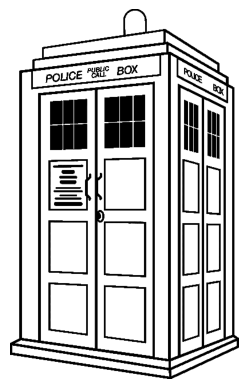

In [ ]:
img = pyStatSTEM.io.read_delimited_text('img.txt')
plt.imshow(-img, cmap='gray')
plt.axis('off')
plt.show()

### Testing preliminary class object instatiations


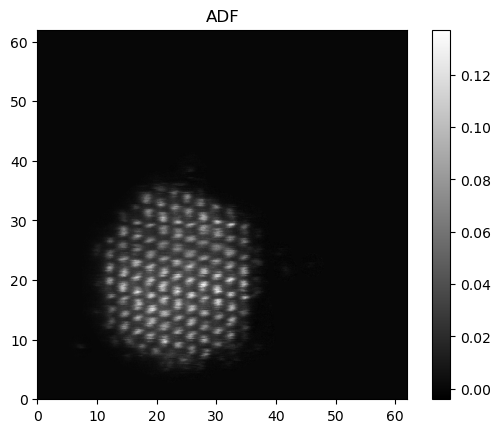

In [ ]:
# Create pyStatSTEM.Image object
im_adf = pyStatSTEM.Image(inputStatSTEM['obs'], 'ADF', inputStatSTEM['dx'])
im_adf.plot()


In [ ]:
from pyStatSTEM.preprocessing import invert_image

# Create new pyStatSTEM.Image object
im_abf = pyStatSTEM.Image(invert_image(inputStatSTEM['obs']),'ABF', inputStatSTEM['dx'])

# Create new pyStatSTEM.Experiment object
ex = pyStatSTEM.Experiment([im_adf, im_abf])
ex.plot()

NameError: name 'im_adf' is not defined

In [ ]:
from tests import test_GMM
test_GMM.test_GMM(path_to_data="Example_PtIr.mat",plot=True)

SyntaxError: invalid syntax (2353454415.py, line 1)